# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
)

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.019345,0.058500,0.059750,0.881750
std,0.484055,0.058633,0.090311,0.101771
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.405525,0.000000,0.000000,0.836000
50%,0.000000,0.056000,0.000000,0.906000
75%,0.315000,0.092500,0.088250,0.940000
max,0.726400,0.178000,0.287000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.244345,0.073250,0.01345,0.91330
std,0.344475,0.079278,0.02766,0.08322
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84050
50%,0.125000,0.037500,0.00000,0.92650
75%,0.557175,0.151750,0.00000,1.00000
max,0.771700,0.194000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score 0.0732

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)  
    # Remove the stopwords
    words = word_tokenize(re_clean)   
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [13]:
# Create a new tokens column for Bitcoin
nltk.download('wordnet')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,compound,positive,negative,neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(10)

[(('illustration', 'taken'), 5),
 (('july', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('attack', 'ha'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('representation', 'virtual'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(10)

[(('cryptocurrency', 'ethereum'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('pc', 'motherboard'), 3),
 (('ethereum', 'network'), 3),
 (('reutersdado', 'ruvicillustrationnew'), 2),
 (('ruvicillustrationnew', 'york'), 2),
 (('aug', 'reuters'), 2),
 (('cryptocurrencies', 'bitcoin'), 2),
 (('ethereum', 'placed'), 2),
 (('placed', 'pc'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 10)

[('bitcoin', 11),
 ('attack', 7),
 ('reuters', 6),
 ('july', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5),
 ('ha', 4),
 ('seen', 4),
 ('ransomware', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
top_eth_wrds = tokenizer(ethereum_df.text.str.cat())
token_count(top_eth_wrds, 10)

[('ethereum', 17),
 ('network', 5),
 ('cryptocurrency', 5),
 ('platform', 4),
 ('like', 4),
 ('ha', 4),
 ('reuters', 4),
 ('blockchain', 3),
 ('cryptocurrencies', 3),
 ('bitcoin', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

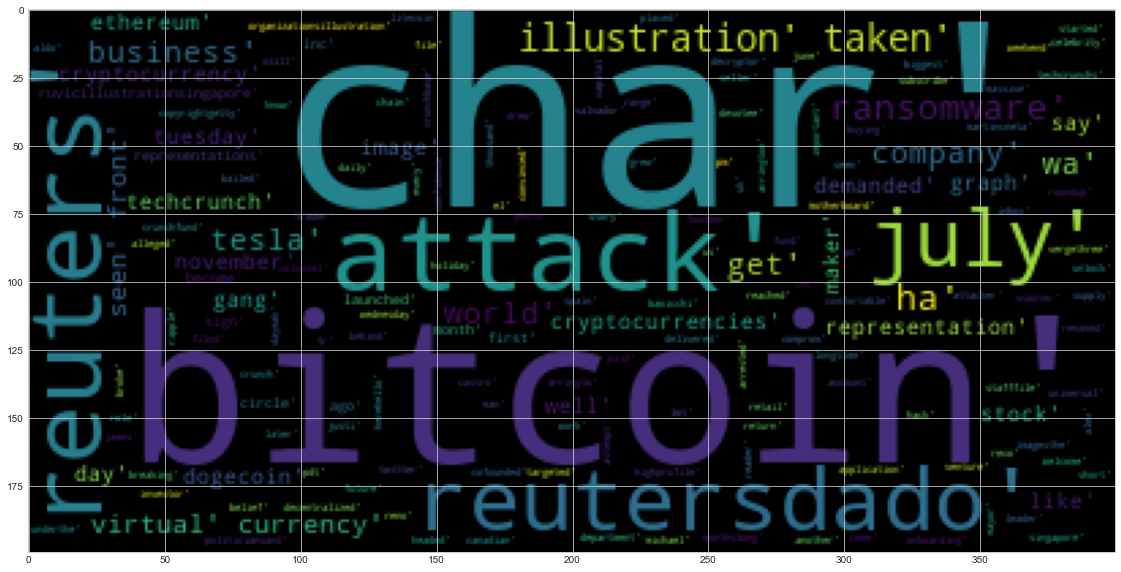

In [22]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)

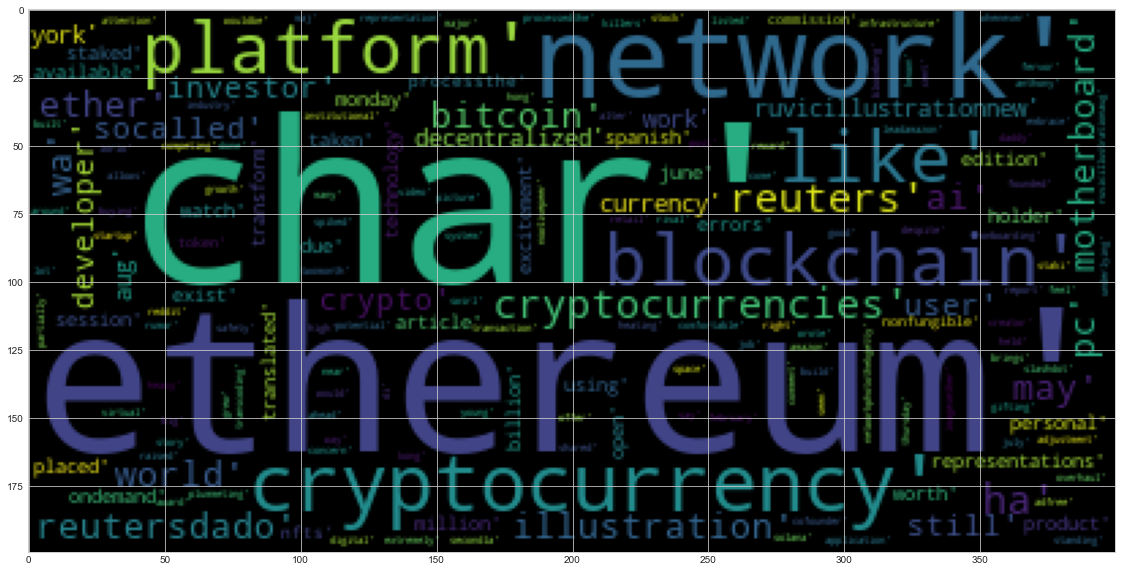

In [23]:
# Generate the Ethereum word cloud
eth_wc = ethereum_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

ModuleNotFoundError: No module named 'spacy'

In [27]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-27-7634e0716970>, line 2)

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

NameError: name 'spacy' is not defined

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---